<font color=purple > _**Emily Nordhoff - 2022**_ </font>

# Exploring Relationships 6.2

This script contains EDA via visualizations for a project about hits in the MLB. Data was gathered from BaseballSavant.mlb.com from the 2021 season. It includes all batted balls in play in the whole season.

### Contents

    1. Importing data and libraries
    2. Subset appropriate variables
    3. Visualizations
        3.1 Heatmap
        3.2 Scatterplot
        3.3 Pair plot
        3.4 Categorical plot
        3.5 Scatterplot with categorical coloring
    4. Revisit business questions
    5. Define hypotheses

## 1. Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'/Users/Emily/Documents/CF Data Analysis Program/Immersion 6/Hits Analysis/'

In [3]:
df = pd.read_pickle(os.path.join(path,'02 data','prepared data','bip_ballparks_merged.pkl'))

In [4]:
df.head()

,pitch_type,game_date,release_speed,player_name,batter,pitcher,events,zone,stand,p_throws,...,park_name,park_location,park_surface,home_team_name,batter_team,contact,runner_1b,runner_2b,runner_3b,scoring_play
0,FC,2021-04-30,82.7,"Altuve, Jose",514888,642232,field_out,4.0,R,L,...,Tropicana Field,"St. Petersburg, Florida",Artificial turf,Tampa Bay Rays,HOU,Under,NaN,NaN,NaN,False
1,FC,2021-04-30,82.4,"Maldonado, Martín",455117,642232,field_out,8.0,R,L,...,Tropicana Field,"St. Petersburg, Florida",Artificial turf,Tampa Bay Rays,HOU,Flare/Burner,NaN,NaN,NaN,False
2,CH,2021-04-30,83.8,"Kiermaier, Kevin",595281,621121,field_out,5.0,L,R,...,Tropicana Field,"St. Petersburg, Florida",Artificial turf,Tampa Bay Rays,TB,Under,NaN,NaN,NaN,False
3,KC,2021-04-30,83.8,"Madrigal, Nick",663611,669456,field_out,8.0,R,R,...,Guaranteed Rate Field,"Chicago, Illinois",Grass,Chicago White Sox,CWS,Topped,1.0,NaN,NaN,False
4,FF,2021-04-30,89.4,"Reynolds, Bryan",668804,607231,field_out,6.0,L,R,...,PNC Park,"Pittsburgh, Pennsylvania",Grass,Pittsburgh Pirates,PIT,Under,NaN,1.0,NaN,False


In [5]:
df.shape

(121707, 52)

In [6]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121707 entries, 0 to 121706
Columns: 52 entries, pitch_type to scoring_play
dtypes: float64(20), int64(12), object(20)
memory usage: 49.2+ MB


In [7]:
%matplotlib inline

## 2. Subset appropriate variables

In [8]:
# These are the all the useful numeric variables

numeric_all = df[['release_speed', 
              'launch_angle', 
              'hit_distance_sc', 
              'launch_speed', 
              'pitch_number', 
              'pfx_x', 
              'pfx_z', 
              'plate_x', 
              'plate_z', 
              'vx0',
              'vy0',
              'vz0', 
              'ax',
              'ay',
              'az']]

In [9]:
# same numeric variables, but for all the successful hits
hits = ['single', 'double', 'triple', 'home_run']

numeric_hits = df[['release_speed', 
                   'launch_angle', 
                   'hit_distance_sc', 
                   'launch_speed', 
                   'pitch_number', 
                   'pfx_x', 
                   'pfx_z', 
                   'plate_x', 
                   'plate_z', 
                   'vx0',
                   'vy0',
                   'vz0', 
                   'ax',
                   'ay',
                   'az',
                   'events']].loc[df['events'].isin(hits)]

In [10]:
# same numeric variables, but for all the outs (unsuccessful hits)

numeric_not_hits = df[['release_speed', 
                      'launch_angle', 
                      'hit_distance_sc', 
                      'launch_speed', 
                      'pitch_number', 
                      'pfx_x', 
                      'pfx_z', 
                      'plate_x', 
                      'plate_z', 
                      'vx0',
                      'vy0',
                      'vz0', 
                      'ax',
                      'ay',
                      'az',
                      'events']].loc[df['events'].isin(hits) == False]

## 3. Visualizations

### 3.1 Correlation heatmap

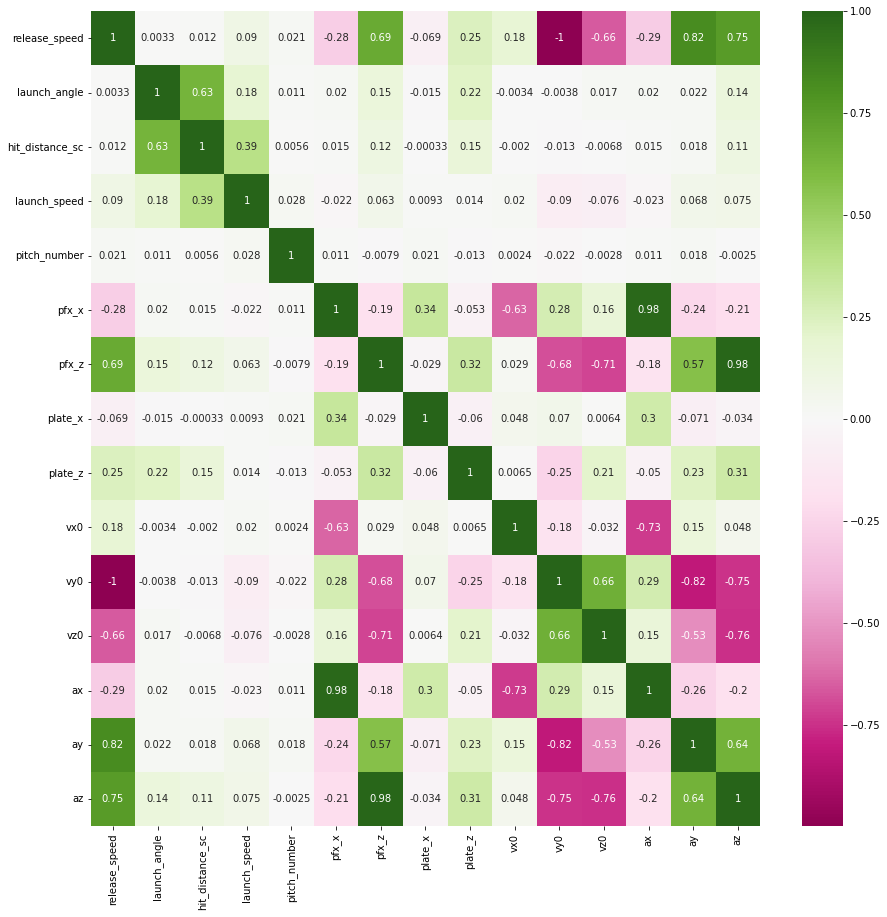

In [11]:
# FOR ALL BATTED BALLS

# create a subplot that is pretty big because there are a lot of variables to compare
f,ax = plt.subplots(figsize=(15,15))

# create a heatmap using seaborn
# Annotate the heatmap and use a fun color scale that indicates
# the strength of the correlation with the deepness of hue.
corr = sns.heatmap(numeric_all.corr(), annot = True, cmap='PiYG')

The darker the pink or green, the stronger the (linear) relationship between the two variables.
</br> </br>
Some expected observations from this heatmap:
<ul>
  <li>The pitch_number has essentially no relationship to any of the other variables. This is because batters swing at pitches in all counts, and that doesn't have an effect on the result of the ball in play.</li>
  <li>Hit_distance has a relatively strong correlation with launch_angle. Basic physics says that a higher angle with all else the same will produce a longer distance for a projectile. Of course there is a sweet spot, and then the launch_angle will be too high. This might not be a linear relationship, but it's definitely <em>a</em> relationship.</li>
  <li>Release_speed is highly correlated with pitch acceleration in both y and z directions. </li>
</ul>
Some unexpected observation that need more investigation:
<ul>
    <li>The acceleration of the pitch in the y and z direction are highly correlated to each other (ax, az).</li>
    <li>There are only very small correlations between the pitch velocity and accelerations and where the ball ends up at the plate (plate_x, plate_y).</li>
</ul>
    

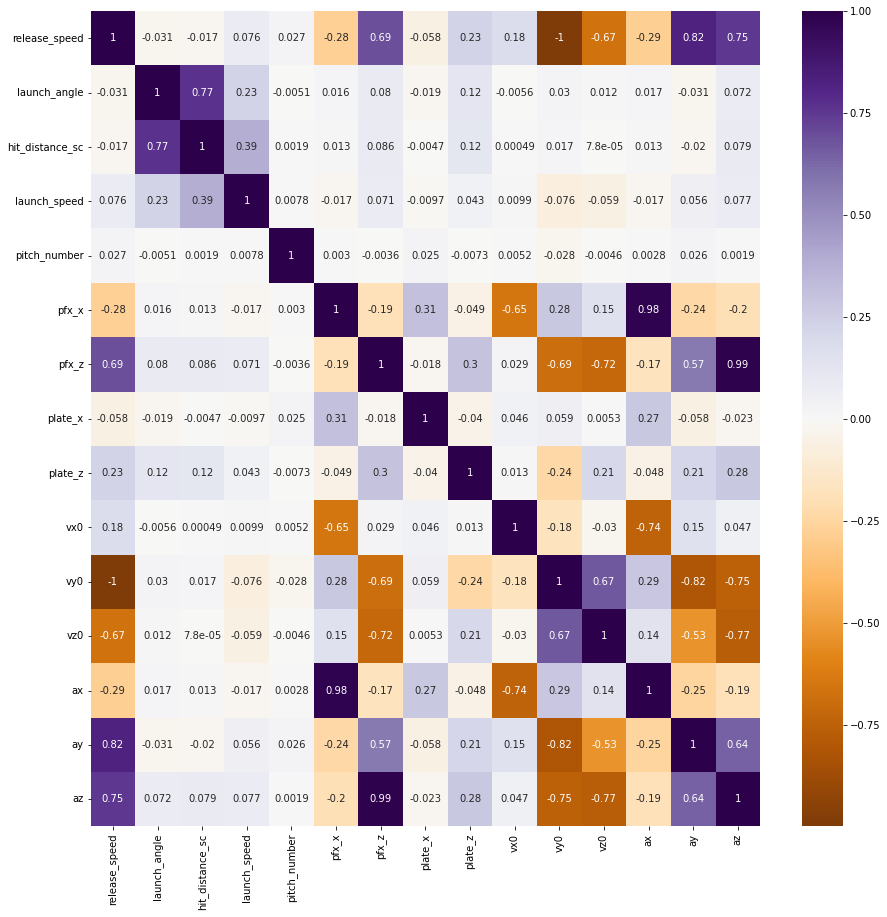

In [12]:
# FOR HITS

# create a subplot that is pretty big because there are a lot of variables to compare
f,ax = plt.subplots(figsize=(15,15))

# create a heatmap using seaborn
# Annotate the heatmap and use a fun color scale that indicates
# the strength of the correlation with the deepness of hue.
corr = sns.heatmap(numeric_hits.corr(), annot = True, cmap='PuOr')

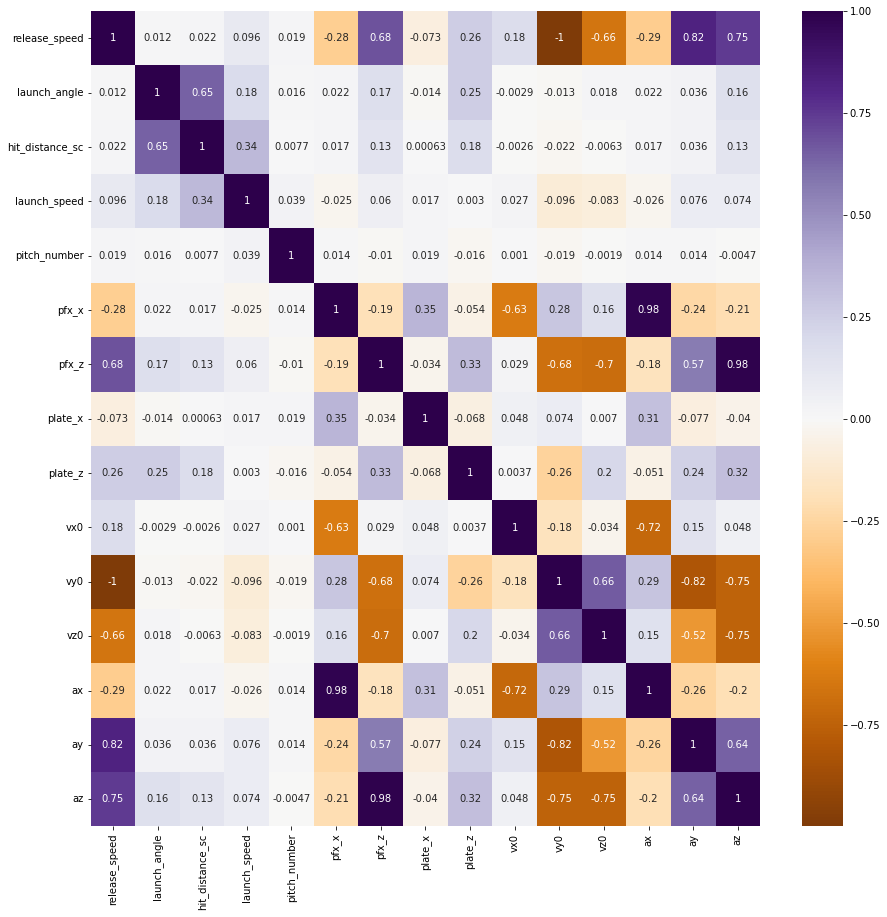

In [13]:
# FOR ALL NOT_HITS

# create a subplot that is pretty big because there are a lot of variables to compare
f,ax = plt.subplots(figsize=(15,15))

# create a heatmap using seaborn
# Annotate the heatmap and use a fun color scale that indicates
# the strength of the correlation with the deepness of hue.
corr = sns.heatmap(numeric_not_hits.corr(), annot = True, cmap='PuOr')

These two heatmaps are really interesting, but there's too much going on to really be able to compare the annotations or the shades of the purple/orange. So, I wanted to create a df that compares the two correlations and see how they differ between the HITS and NON-HITS.

In [14]:
# using pandas' compare function, we can see the values side by side of the two correlation tables

compare = numeric_hits.corr().compare(numeric_not_hits.corr())
compare

release_speed           launch_angle            \
                         self     other         self     other   
release_speed             NaN       NaN    -0.030635  0.012312   
launch_angle        -0.030635  0.012312          NaN       NaN   
hit_distance_sc     -0.017314  0.021891     0.768790  0.647688   
launch_speed         0.075811  0.095733     0.233908  0.183577   
pitch_number         0.027349  0.018670    -0.005057  0.015517   
pfx_x               -0.279339 -0.282709     0.016494  0.022205   
pfx_z                0.690838  0.684472     0.079616  0.168553   
plate_x             -0.058360 -0.073191    -0.019495 -0.014197   
plate_z              0.233649  0.257474     0.121788  0.252400   
vx0                  0.178033  0.176086    -0.005623 -0.002949   
vy0                 -0.999833 -0.999834     0.029940 -0.012786   
vz0                 -0.671483 -0.660164     0.012060  0.018250   
ax                  -0.285717 -0.291150     0.016531  0.021751   
ay                   0.824406  0.824704    -0.031123  0.036057   
az                   0.752895  0.749169     0.071568  0.159852   

                hit_distance_sc           launch_speed           pitch_number  \
                           self     other         self     other         self   
release_speed         -0.017314  0.021891     0.075811  0.095733     0.027349   
launch_angle           0.768790  0.647688     0.233908  0.183577    -0.005057   
hit_distance_sc             NaN       NaN     0.386626  0.341095     0.001914   
launch_speed           0.386626  0.341095          NaN       NaN     0.007838   
pitch_number           0.001914  0.007694     0.007838  0.038754          NaN   
pfx_x                  0.012902  0.017244    -0.017288 -0.024673     0.003035   
pfx_z                  0.086210  0.133970     0.070649  0.059729    -0.003572   
plate_x               -0.004683  0.000627    -0.009712  0.016733     0.024669   
plate_z                0.116838  0.176792     0.043089  0.003034    -0.007294   
vx0                    0.000495 -0.002575     0.009943  0.026718     0.005230   
vy0                    0.016731 -0.022164    -0.075810 -0.095522    -0.027536   
vz0                    0.000078 -0.006280    -0.058510 -0.083236    -0.004634   
ax                     0.012960  0.016913    -0.016530 -0.026207     0.002759   
ay                    -0.019947  0.035570     0.055648  0.075785     0.025984   
az                     0.079459  0.131771     0.077022  0.073601     0.001931   

                           ...       vy0                 vz0            \
                    other  ...      self     other      self     other   
release_speed    0.018670  ... -0.999833 -0.999834 -0.671483 -0.660164   
launch_angle     0.015517  ...  0.029940 -0.012786  0.012060  0.018250   
hit_distance_sc  0.007694  ...  0.016731 -0.022164  0.000078 -0.006280   
launch_speed     0.038754  ... -0.075810 -0.095522 -0.058510 -0.083236   
pitch_number          NaN  ... -0.027536 -0.018903 -0.004634 -0.001865   
pfx_x            0.014199  ...  0.278619  0.281932  0.154946  0.163998   
pfx_z           -0.009989  ... -0.688824 -0.682390 -0.723139 -0.698003   
plate_x          0.018954  ...  0.059436  0.074221  0.005288  0.007024   
plate_z         -0.016244  ... -0.236977 -0.260765  0.206824  0.204559   
vx0              0.001025  ... -0.178227 -0.176126 -0.029807 -0.033737   
vy0             -0.018903  ...       NaN       NaN  0.670692  0.659374   
vz0             -0.001865  ...  0.670692  0.659374       NaN       NaN   
ax               0.014379  ...  0.285066  0.290422  0.142875  0.152494   
ay               0.013810  ... -0.819293 -0.819574 -0.534549 -0.520899   
az              -0.004680  ... -0.750807 -0.747019 -0.771502 -0.748114   

                       ax                  ay                  az            
                     self     other      self     other      self     other  
release_speed   -0.285717 -0.291150  0.824406  0.824704  0.752895  0.749169  
launch_angle     0.016

In [15]:
# but a table is really difficult to see what's going on,
# so let's make a more simple table and then another heatmap to compare the differences.

diff = pd.DataFrame()
for col in compare.columns.get_level_values(0).tolist():
    diff[col] = compare[col, 'self'] - compare[col, 'other']

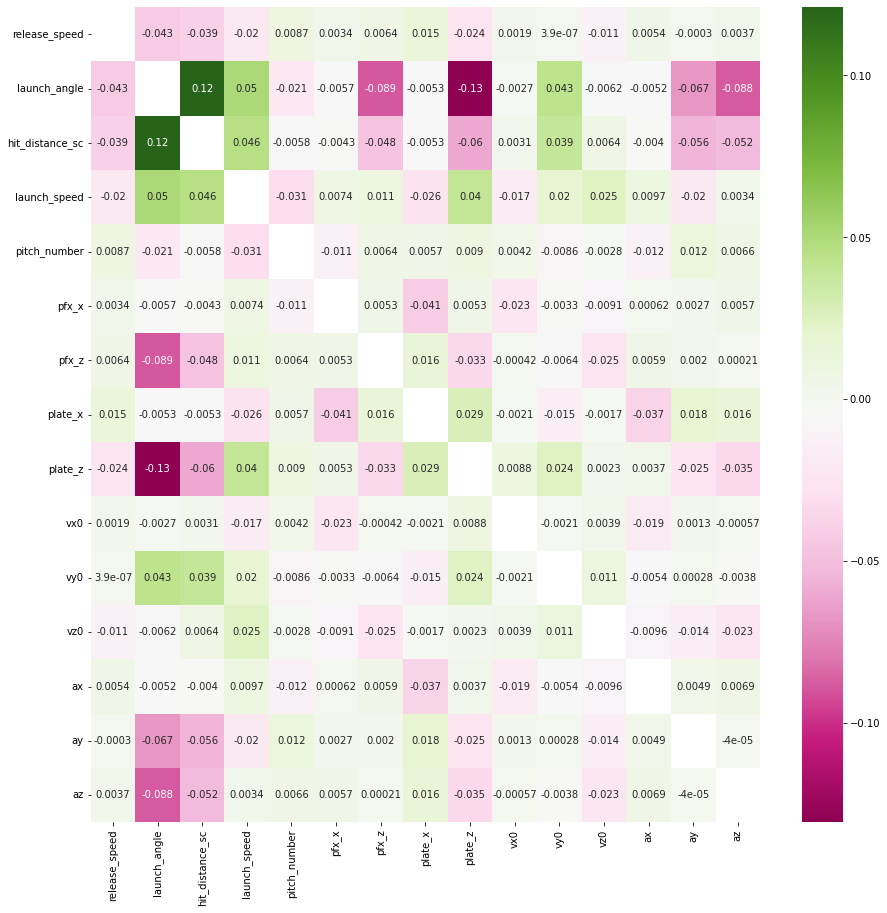

In [16]:
# create the heatmap to compare the differences between the correlations of HITS vs. NOT_HITS

f,ax = plt.subplots(figsize=(15,15))

# create a heatmap using seaborn
# Annotate the heatmap and use a fun color scale that indicates
# the strength of the correlation with the deepness of hue.
corr = sns.heatmap(diff, annot = True, cmap='PiYG')

The first thing to notice about this heat map is the scale - the range is approximately -.15 to .15, MUCH smaller than -1 to 1. </br> </br>
Relationships that have the largest differences:
<ul>
    <li>hit_distance and launch_angle</li>
    <li>pfx_z and launch_angle</li>
    <li>plate_z and launch_angle</li>
    <li>ax and launch_angle</li>
    <li>hit_distance and plate_z</li>
</ul>

### 3.2 Scatterplots

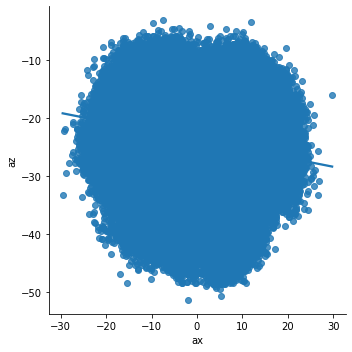

In [17]:
# create a scatterplot of ax & az for ALL

sns.lmplot(x='ax', y='az', data=numeric_all)

This doesn't actually look like much of a correlation at all

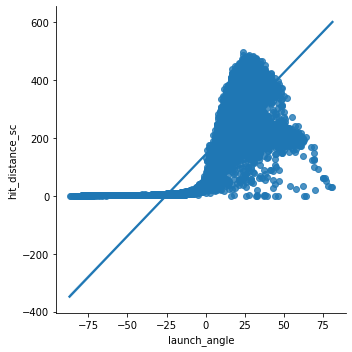

In [18]:
# create a scatterplot of launch_angle and hit_distance for HITS

sns.lmplot(x='launch_angle', y='hit_distance_sc', data=numeric_hits)

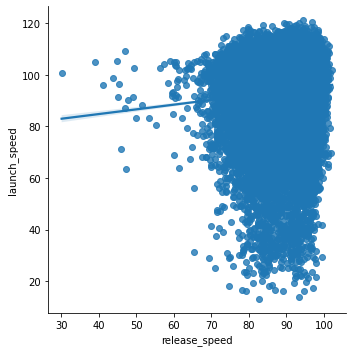

In [19]:
# create a scatterplot of launch_angle and hit_distance for HITS

sns.lmplot(x='release_speed', y='launch_speed', data=numeric_hits)

This is definitely not a linear relationship

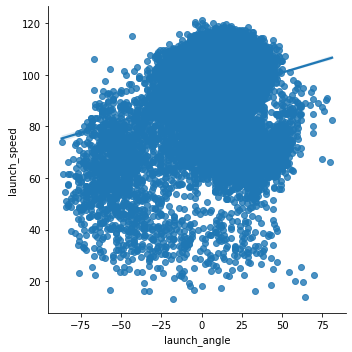

In [20]:
# create a scatterplot of launch_angle and hit_distance for HITS

sns.lmplot(x='launch_angle', y='launch_speed', data=numeric_hits)

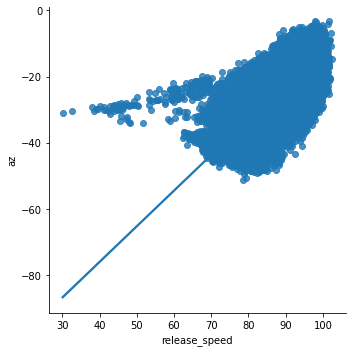

In [21]:
# create a scatterplot of launch_angle and hit_distance for HITS

sns.lmplot(x='release_speed', y='az', data=numeric_all)

This scatterplot makes some more sense because it doesn't have to do with the outcome of the pitch, but rather the pitch itself. It's looking at acceleration in the vertical (z) plane (ft/s) compared to release speed of the pitch. The pitches that don't fit with the line are likely due to some pitchers' unique release point that is more in the horizontal plane so the ball doesn't move as much vertically.

### 3.3 Pair plots

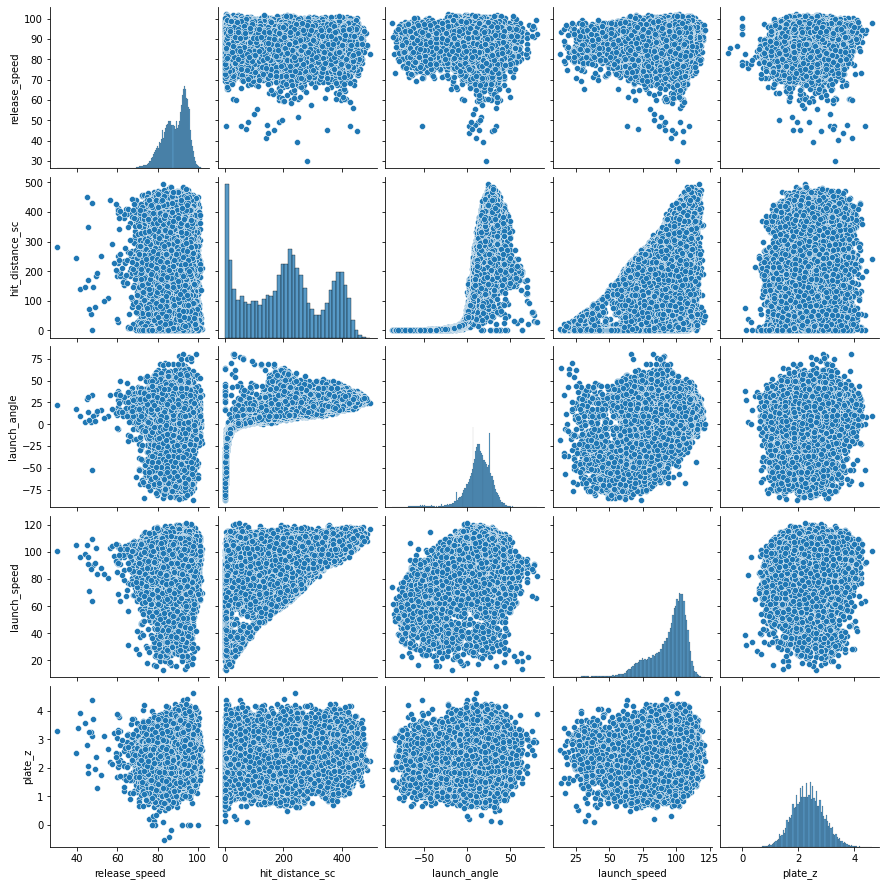

In [22]:
# I'm just going to look at a few variables

sub = numeric_hits[['release_speed', 'hit_distance_sc', 'launch_angle', 'launch_speed', 'plate_z']]

sns.pairplot(sub)

The charts that I think are the most interesting here are:
<ul>
    <li>The logarithmic relationship between launch angle and hit distance</li>
    <li>The relationship between launch speed and hit distance</li>
</ul>

### 3.4 Categorical plot

In [23]:
# basically the same thing as numeric_hits, but with ALL the variables
data = df[df['events'].isin(hits)]

In [24]:
data['events'].value_counts()

single      25006
double       7863
home_run     5944
triple        671
Name: events, dtype: int64

CPU times: user 2.56 s, sys: 137 ms, total: 2.7 s
Wall time: 2.99 s


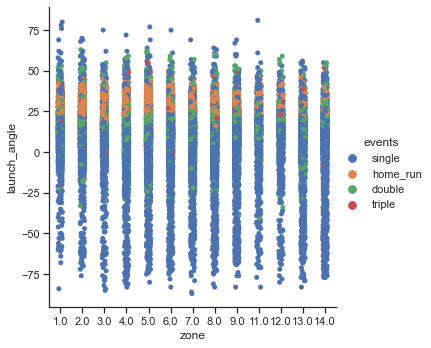

In [25]:
%%time
# this looks at which zone gets hit for which type of hit
# Zones 1-9 are defined as within the strike zone (with 5 at the very middle)
# Zones 11-14 are the corners, outside the stirke zone

sns.set_theme(style="ticks")
sns.catplot(y='launch_angle', x='zone', hue='events', data=data)

What this is showing is that singles are hit from all zones, but home_runs are largely hit from zones 1-9 (not 11-14).

### 3.5 Scatterplot with categorical coloring (just for fun)

<AxesSubplot:xlabel='launch_speed', ylabel='launch_angle'>

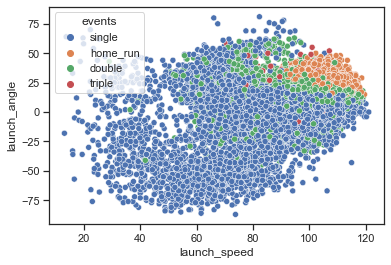

In [26]:
# I was stuggling with trying to get the catplot to do what I really just wanted to see in a scatterplot

sns.scatterplot(x='launch_speed', y='launch_angle', hue='events', data=numeric_hits)

## 4. Revisit business questions

- Given the launch angle and exit velocity, how reliably can you predict home runs?
- Where in the zone are pitches typically hit for line drives vs. pop up vs. fly balls?
- How does the handedness of pitchers and batters impact their success at the plate?
- Where are the shortest home runs hit?
- Which parks yield more hits?
- What is the best count to get a hit?
- Which position in the field gets hit the highest percentage of batted balls?


These are largely not seen in this numeric analysis of continuous variables so far. I look forward to doing some grouping and then revisiting these plots. Specifically looking at handedness of pitchers and batters, and park location.

## 5. Define hypotheses

- More hits occur on "batter's counts" such as 1-0, 2-1, 3-1 than on pitcher's counts (the rest).
- Pop ups occur more frequently when the pitch is high in the zone.
- More home runs are hit in Colorado because of the altitude.